<a href="https://colab.research.google.com/github/KValim/Projetcs/blob/main/Alura/alura%20challenge%20data%20science/Alura_Challenge_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.alura.com.br/challenges/data-science/semana-01-primeiros-passos-data-science

https://www.alura.com.br/challenges/data-science/semana-02-explorando-os-dados

https://www.alura.com.br/challenges/data-science/semana-03-04-exterminando-o-futuro

# FUNÇÕES

# BIBLIOTECAS

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# DATABASE

In [54]:
url = 'https://raw.githubusercontent.com/KValim/Projetcs/main/Alura/alura%20challenge%20data%20science/dataset/Telco-Customer-Churn.json'
df = pd.read_json(url)

df.head(5)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


*nested json, para entender melhor → https://medium.com/swlh/converting-nested-json-structures-to-pandas-dataframes-e8106c59976e*

## TRATANDO

In [3]:
customer = pd.json_normalize(df['customer'])
customer.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [4]:
phone = pd.json_normalize(df['phone'])
phone.head()

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [5]:
internet = pd.json_normalize(df['internet'])
internet.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [6]:
account = pd.json_normalize(df['account'])
account.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


*Removendo as colunas nested e acrescendo as tratadas*

In [7]:
df = df.drop(columns=['customer', 'phone', 'internet', 'account'])
df.head()

,customerID,Churn
0,0002-ORFBO,No
1,0003-MKNFE,No
2,0004-TLHLJ,Yes
3,0011-IGKFF,Yes
4,0013-EXCHZ,Yes


In [8]:
df = pd.concat([df, customer,phone, internet, account], axis=1)
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


### TRADUZINDO

In [9]:
dicionario = {
    'customerID' : 'ID_cliente',
    'Churn' : 'churn',
    'gender' : 'cliente_genero',
    'SeniorCitizen' : 'cliente_idoso',
    'Partner' : 'cliente_casado',
    'Dependents' : 'cliente_dependetes',
    'tenure' : 'cliente_meses_de_contrato',
    'PhoneService' : 'telefone_servico',
    'MultipleLines' : 'telefone_varias_linhas',
    'InternetService' : 'internet_servico',
    'OnlineSecurity': 'internet_seguranca_online',
    'OnlineBackup' : 'internet_backup_online',
    'DeviceProtection' : 'internet_protecao_aparecelho',
    'TechSupport' : 'internet_suporte_tecnico',
    'StreamingTV' : 'internet_TV_a_cabo',
    'StreamingMovies' : 'internet_streaming',
    'Contract' : 'conta_contrato',
    'PaperlessBilling' : 'conta_recebimento_online',
    'PaymentMethod' : 'conta_metodo_pagamento',
    'Charges.Monthly' : 'conta_cobranca_mensal',
    'Charges.Total' : 'conta_cobranca_total'
}

df.rename(columns = dicionario, inplace = True)
df.head()

,ID_cliente,churn,cliente_genero,cliente_idoso,cliente_casado,cliente_dependetes,cliente_meses_de_contrato,telefone_servico,telefone_varias_linhas,internet_servico,...,internet_backup_online,internet_protecao_aparecelho,internet_suporte_tecnico,internet_TV_a_cabo,internet_streaming,conta_contrato,conta_recebimento_online,conta_metodo_pagamento,conta_cobranca_mensal,conta_cobranca_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [10]:
# dicionário com as traduções
translate = {
    'Female': 'feminino', 
    'Male': 'masculino',
    'Yes': 'sim', 
    'No': 'nao', 
    'No phone service' : 'nao assina telefone', 
    'No internet service' : 'nao assina internet',
    'One year': '1 ano', 
    'Month-to-month': 'mensal', 
    'Two year' : '2 anos',
    'Mailed check': 'cheque por correio', 
    'Electronic check': 'cheque eletronico', 
    'Credit card (automatic)': 'cartao de credito',
    'Bank transfer (automatic)': 'transferencia bancaria'
}

df.replace(to_replace=translate, inplace=True)


internet_service = {'DSL': 'cabo', 
                    'Fiber optic': 'fibra', 
                    'No': 'nao assina internet'
}

df['internet_servico'] = df['internet_servico'].map(internet_service)

df.head()

,ID_cliente,churn,cliente_genero,cliente_idoso,cliente_casado,cliente_dependetes,cliente_meses_de_contrato,telefone_servico,telefone_varias_linhas,internet_servico,...,internet_backup_online,internet_protecao_aparecelho,internet_suporte_tecnico,internet_TV_a_cabo,internet_streaming,conta_contrato,conta_recebimento_online,conta_metodo_pagamento,conta_cobranca_mensal,conta_cobranca_total
0,0002-ORFBO,nao,feminino,0,sim,sim,9,sim,nao,cabo,...,sim,nao,sim,sim,nao,1 ano,sim,cheque por correio,65.6,593.3
1,0003-MKNFE,nao,masculino,0,nao,nao,9,sim,sim,cabo,...,nao,nao,nao,nao,sim,mensal,nao,cheque por correio,59.9,542.4
2,0004-TLHLJ,sim,masculino,0,nao,nao,4,sim,nao,fibra,...,nao,sim,nao,nao,nao,mensal,sim,cheque eletronico,73.9,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13,sim,nao,fibra,...,sim,sim,nao,sim,sim,mensal,sim,cheque eletronico,98.0,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3,sim,nao,fibra,...,nao,nao,sim,sim,nao,mensal,sim,cheque por correio,83.9,267.4


## VERICANDO INCONSISTENCIAS

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID_cliente                    7267 non-null   object 
 1   churn                         7267 non-null   object 
 2   cliente_genero                7267 non-null   object 
 3   cliente_idoso                 7267 non-null   int64  
 4   cliente_casado                7267 non-null   object 
 5   cliente_dependetes            7267 non-null   object 
 6   cliente_meses_de_contrato     7267 non-null   int64  
 7   telefone_servico              7267 non-null   object 
 8   telefone_varias_linhas        7267 non-null   object 
 9   internet_servico              5686 non-null   object 
 10  internet_seguranca_online     7267 non-null   object 
 11  internet_backup_online        7267 non-null   object 
 12  internet_protecao_aparecelho  7267 non-null   object 
 13  int

In [12]:
# selecionando as colunas categóricas
categorical_cols = df.columns

# verificando os valores únicos de cada coluna categórica
for col in categorical_cols:
  print(f'Coluna: {col}\nValores únicos: {df[col].unique()}\n')

Coluna: ID_cliente
Valores únicos: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Coluna: churn
Valores únicos: ['nao' 'sim' '']

Coluna: cliente_genero
Valores únicos: ['feminino' 'masculino']

Coluna: cliente_idoso
Valores únicos: [0 1]

Coluna: cliente_casado
Valores únicos: ['sim' 'nao']

Coluna: cliente_dependetes
Valores únicos: ['sim' 'nao']

Coluna: cliente_meses_de_contrato
Valores únicos: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]

Coluna: telefone_servico
Valores únicos: ['sim' 'nao']

Coluna: telefone_varias_linhas
Valores únicos: ['nao' 'sim' 'nao assina telefone']

Coluna: internet_servico
Valores únicos: ['cabo' 'fibra' nan]

Coluna: internet_seguranca_online
Valores únicos: ['nao' 'sim' 'nao assina internet']

Coluna: internet_backup_online
Valores único

### CHURN

In [13]:
df['churn'].value_counts()

nao    5174
sim    1869
        224
Name: churn, dtype: int64

In [14]:
emptyChurn = df[df['churn'] == ''].index
total = df['churn'].value_counts()[0] + df['churn'].value_counts()[1] + df['churn'].value_counts()[2]
removidos = df['churn'].value_counts()[2]
df.drop(emptyChurn, axis=0, inplace=True)

variacao_percentual = (total-removidos - total) / total * 100
print("Quantidade de registros antes da remoção dos valores nulos", total)
print("Quantidade de registros depois da remoção das linhas com valores nulos",total - removidos)
print(f"Porcentagem de registros removidos {variacao_percentual:.2f}%")

Quantidade de registros antes da remoção dos valores nulos 7267
Quantidade de registros depois da remoção das linhas com valores nulos 7043
Porcentagem de registros removidos -3.08%


In [15]:
df['churn'].unique()

array(['nao', 'sim'], dtype=object)

### COBRANÇA TOTAL

In [16]:
df['conta_cobranca_total'] = df['conta_cobranca_total'].apply(lambda x: np.nan if x == ' ' else float(x))


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID_cliente                    7043 non-null   object 
 1   churn                         7043 non-null   object 
 2   cliente_genero                7043 non-null   object 
 3   cliente_idoso                 7043 non-null   int64  
 4   cliente_casado                7043 non-null   object 
 5   cliente_dependetes            7043 non-null   object 
 6   cliente_meses_de_contrato     7043 non-null   int64  
 7   telefone_servico              7043 non-null   object 
 8   telefone_varias_linhas        7043 non-null   object 
 9   internet_servico              5517 non-null   object 
 10  internet_seguranca_online     7043 non-null   object 
 11  internet_backup_online        7043 non-null   object 
 12  internet_protecao_aparecelho  7043 non-null   object 
 13  int

In [18]:
df.loc[df['conta_cobranca_total'].isna()]

,ID_cliente,churn,cliente_genero,cliente_idoso,cliente_casado,cliente_dependetes,cliente_meses_de_contrato,telefone_servico,telefone_varias_linhas,internet_servico,...,internet_backup_online,internet_protecao_aparecelho,internet_suporte_tecnico,internet_TV_a_cabo,internet_streaming,conta_contrato,conta_recebimento_online,conta_metodo_pagamento,conta_cobranca_mensal,conta_cobranca_total
975,1371-DWPAZ,nao,feminino,0,sim,sim,0,nao,nao assina telefone,cabo,...,sim,sim,sim,sim,nao,2 anos,nao,cartao de credito,56.05,NaN
1775,2520-SGTTA,nao,feminino,0,sim,sim,0,sim,nao,NaN,...,nao assina internet,nao assina internet,nao assina internet,nao assina internet,nao assina internet,2 anos,nao,cheque por correio,20.00,NaN
1955,2775-SEFEE,nao,masculino,0,nao,sim,0,sim,sim,cabo,...,sim,nao,sim,nao,nao,2 anos,sim,transferencia bancaria,61.90,NaN
2075,2923-ARZLG,nao,masculino,0,sim,sim,0,sim,nao,NaN,...,nao assina internet,nao assina internet,nao assina internet,nao assina internet,nao assina internet,1 ano,sim,cheque por correio,19.70,NaN
2232,3115-CZMZD,nao,masculino,0,nao,sim,0,sim,nao,NaN,...,nao assina internet,nao assina internet,nao assina internet,nao assina internet,nao assina internet,2 anos,nao,cheque por correio,20.25,NaN
2308,3213-VVOLG,nao,masculino,0,sim,sim,0,sim,sim,NaN,...,nao assina internet,nao assina internet,nao assina internet,nao assina internet,nao assina internet,2 anos,nao,cheque por correio,25.35,NaN
2930,4075-WKNIU,nao,feminino,0,sim,sim,0,sim,sim,cabo,...,sim,sim,sim,sim,nao,2 anos,nao,cheque por correio,73.35,NaN
3134,4367-NUYAO,nao,masculino,0,sim,sim,0,sim,sim,NaN,...,nao assina internet,nao assina internet,nao assina internet,nao assina internet,nao assina internet,2 anos,nao,cheque por correio,25.75,NaN
3203,4472-LVYGI,nao,feminino,0,sim,sim,0,nao,nao assina telefone,cabo,...,nao,sim,sim,sim,nao,2 anos,sim,transferencia bancaria,52.55,NaN
4169,5709-LVOEQ,nao,feminino,0,sim,sim,0,sim,nao,cabo,...,sim,sim,nao,sim,sim,2 anos,nao,cheque por correio,80.85,NaN


Os clientes com conta.cobranca.total ingual a NaN têm um tempo de permanência igual a zero, ou seja, desisistiram do contrato antes de completarem um mês de contrato. Assim os valores nulos de conta.cobranca.total serão substituídos pelo valor do gasto mensal conta.cobranca.mesal.


In [19]:
idx_na = df['conta_cobranca_total'].isna()
df.loc[idx_na, 'conta_cobranca_total'] = df.loc[idx_na, "conta_cobranca_mensal"]
df.query('cliente_meses_de_contrato == 0')[['conta_cobranca_total', 'conta_cobranca_mensal', 'cliente_meses_de_contrato']]

,conta_cobranca_total,conta_cobranca_mensal,cliente_meses_de_contrato
975,56.05,56.05,0
1775,20.00,20.00,0
1955,61.90,61.90,0
2075,19.70,19.70,0
2232,20.25,20.25,0
2308,25.35,25.35,0
2930,73.35,73.35,0
3134,25.75,25.75,0
3203,52.55,52.55,0
4169,80.85,80.85,0


### CLIENTE IDOSO

In [20]:
df.cliente_idoso.replace({0:"nao", 1:"sim"}, inplace=True)
df.head()

,ID_cliente,churn,cliente_genero,cliente_idoso,cliente_casado,cliente_dependetes,cliente_meses_de_contrato,telefone_servico,telefone_varias_linhas,internet_servico,...,internet_backup_online,internet_protecao_aparecelho,internet_suporte_tecnico,internet_TV_a_cabo,internet_streaming,conta_contrato,conta_recebimento_online,conta_metodo_pagamento,conta_cobranca_mensal,conta_cobranca_total
0,0002-ORFBO,nao,feminino,nao,sim,sim,9,sim,nao,cabo,...,sim,nao,sim,sim,nao,1 ano,sim,cheque por correio,65.6,593.30
1,0003-MKNFE,nao,masculino,nao,nao,nao,9,sim,sim,cabo,...,nao,nao,nao,nao,sim,mensal,nao,cheque por correio,59.9,542.40
2,0004-TLHLJ,sim,masculino,nao,nao,nao,4,sim,nao,fibra,...,nao,sim,nao,nao,nao,mensal,sim,cheque eletronico,73.9,280.85
3,0011-IGKFF,sim,masculino,sim,sim,nao,13,sim,nao,fibra,...,sim,sim,nao,sim,sim,mensal,sim,cheque eletronico,98.0,1237.85
4,0013-EXCHZ,sim,feminino,sim,sim,nao,3,sim,nao,fibra,...,nao,nao,sim,sim,nao,mensal,sim,cheque por correio,83.9,267.40


In [21]:
df.describe()

,cliente_meses_de_contrato,conta_cobranca_mensal,conta_cobranca_total
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.798992
std,24.559481,30.090047,2266.730170
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


# ADICIONANDO COBRANCA DIARIA

In [22]:
df['conta_cobranca_diaria'] = (df['conta_cobranca_mensal']/30).round(decimals = 2)

In [23]:
mensal = df.pop('conta_cobranca_mensal')
total = df.pop('conta_cobranca_total')
df['conta_cobranca_mensal'] = mensal
df['conta_cobranca_total'] = total
df.head()

,ID_cliente,churn,cliente_genero,cliente_idoso,cliente_casado,cliente_dependetes,cliente_meses_de_contrato,telefone_servico,telefone_varias_linhas,internet_servico,...,internet_protecao_aparecelho,internet_suporte_tecnico,internet_TV_a_cabo,internet_streaming,conta_contrato,conta_recebimento_online,conta_metodo_pagamento,conta_cobranca_diaria,conta_cobranca_mensal,conta_cobranca_total
0,0002-ORFBO,nao,feminino,nao,sim,sim,9,sim,nao,cabo,...,nao,sim,sim,nao,1 ano,sim,cheque por correio,2.19,65.6,593.30
1,0003-MKNFE,nao,masculino,nao,nao,nao,9,sim,sim,cabo,...,nao,nao,nao,sim,mensal,nao,cheque por correio,2.00,59.9,542.40
2,0004-TLHLJ,sim,masculino,nao,nao,nao,4,sim,nao,fibra,...,sim,nao,nao,nao,mensal,sim,cheque eletronico,2.46,73.9,280.85
3,0011-IGKFF,sim,masculino,sim,sim,nao,13,sim,nao,fibra,...,sim,nao,sim,sim,mensal,sim,cheque eletronico,3.27,98.0,1237.85
4,0013-EXCHZ,sim,feminino,sim,sim,nao,3,sim,nao,fibra,...,nao,sim,sim,nao,mensal,sim,cheque por correio,2.80,83.9,267.40


# VALORES BINÁRIOS

In [24]:
mapa_binarios = {
    'sim' : 1,
    'nao' : 0,
    'feminino' : 1,
    'masculino' : 0,
}
colunas_binarias = ['churn', 'cliente_genero', 'cliente_idoso', 'cliente_casado', 'cliente_dependetes',
                    'telefone_servico', 'telefone_varias_linhas', 'internet_seguranca_online',
                    'internet_backup_online', 'internet_protecao_aparecelho', 'internet_suporte_tecnico',
                    'internet_TV_a_cabo', 'internet_streaming', 'conta_recebimento_online']

df[colunas_binarias] = df[colunas_binarias].replace(mapa_binarios)
df.head()

,ID_cliente,churn,cliente_genero,cliente_idoso,cliente_casado,cliente_dependetes,cliente_meses_de_contrato,telefone_servico,telefone_varias_linhas,internet_servico,...,internet_protecao_aparecelho,internet_suporte_tecnico,internet_TV_a_cabo,internet_streaming,conta_contrato,conta_recebimento_online,conta_metodo_pagamento,conta_cobranca_diaria,conta_cobranca_mensal,conta_cobranca_total
0,0002-ORFBO,0,1,0,1,1,9,1,0,cabo,...,0,1,1,0,1 ano,1,cheque por correio,2.19,65.6,593.30
1,0003-MKNFE,0,0,0,0,0,9,1,1,cabo,...,0,0,0,1,mensal,0,cheque por correio,2.00,59.9,542.40
2,0004-TLHLJ,1,0,0,0,0,4,1,0,fibra,...,1,0,0,0,mensal,1,cheque eletronico,2.46,73.9,280.85
3,0011-IGKFF,1,0,1,1,0,13,1,0,fibra,...,1,0,1,1,mensal,1,cheque eletronico,3.27,98.0,1237.85
4,0013-EXCHZ,1,1,1,1,0,3,1,0,fibra,...,0,1,1,0,mensal,1,cheque por correio,2.80,83.9,267.40


# ANALISE CHURN

In [25]:
cliente =   ['cliente_genero', 'cliente_idoso', 'cliente_casado', 'cliente_dependetes', 'cliente_meses_de_contrato']
telefone =  ['telefone_servico', 'telefone_varias_linhas']
internet =  ['internet_seguranca_online', 'internet_backup_online', 'internet_protecao_aparecelho', 'internet_suporte_tecnico', 'internet_TV_a_cabo', 'internet_streaming']
conta =     ['conta_contrato', 'conta_recebimento_online', 'conta_metodo_pagamento', 'conta_cobranca_diaria', 'conta_cobranca_mensal', 'conta_cobranca_total']

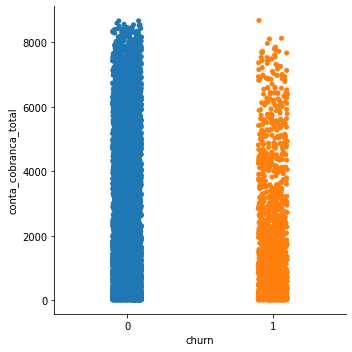

In [26]:
sns.catplot(x='churn', y='conta_cobranca_total', data=df)

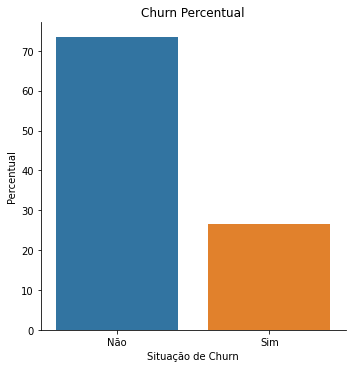

In [27]:
churn_rate = df.churn.value_counts(normalize=True)*100
churn_rate = churn_rate.to_frame().reset_index()
churn_rate.columns = ['Situação de Churn', 'Percentual']

fig = sns.catplot( x='Situação de Churn', y='Percentual', kind = 'bar',data=churn_rate).set(xticklabels=['Não', 'Sim'],
                                                                                            title ="Churn Percentual")



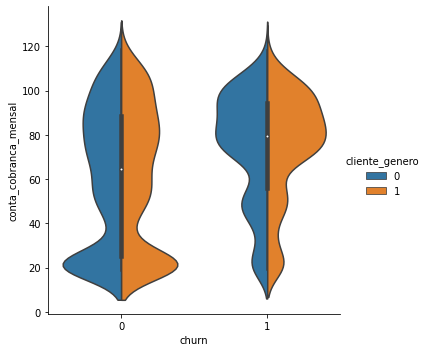

In [28]:
sns.catplot(x='churn', y='conta_cobranca_mensal', hue='cliente_genero', kind='violin', split=True, data=df)

## COBRAÇA TOTAL

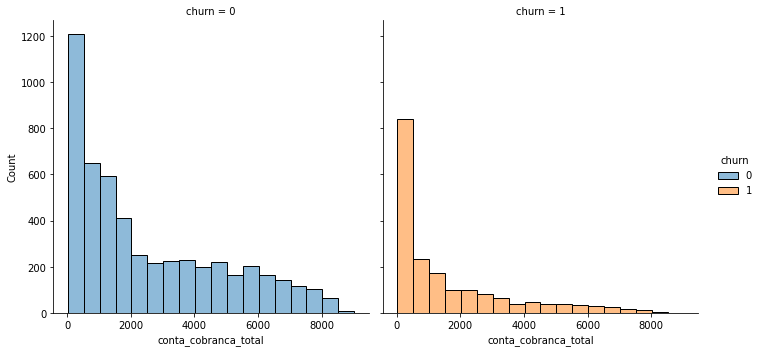

In [29]:
sns.displot(data=df, binwidth=500, x='conta_cobranca_total', col='churn', hue='churn')

## MESES DE CONTRATO

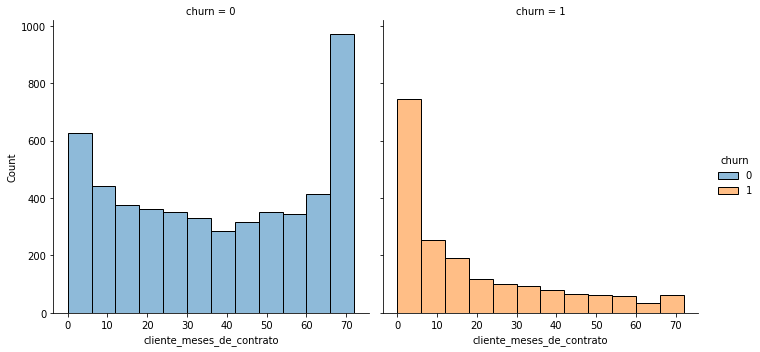

In [30]:
sns.displot(data=df, binwidth=6, x='cliente_meses_de_contrato', col='churn', hue='churn')

## CORRELAÇÃO

In [31]:
# função que transforma os valores categóricos de uma coluna em valores numéricos
def label_encoding(categorical_col):
  # altera o tipo de "object" para o tipo "category"
  encode = categorical_col.astype('category')

  # atribui a cada categoria um valor numérico diferente
  return encode.cat.codes

In [32]:
# listando as colunas categóricas
df.select_dtypes(include=object).columns

Index(['ID_cliente', 'telefone_varias_linhas', 'internet_servico',
       'internet_seguranca_online', 'internet_backup_online',
       'internet_protecao_aparecelho', 'internet_suporte_tecnico',
       'internet_TV_a_cabo', 'internet_streaming', 'conta_contrato',
       'conta_metodo_pagamento'],
      dtype='object')

In [33]:
# retirei a coluna "cliente_ID", pois não irá fazer sentido o encode dela
cat_columns = [ 'telefone_varias_linhas', 'internet_servico',
                'internet_seguranca_online', 'internet_backup_online',
                'internet_protecao_aparecelho', 'internet_suporte_tecnico',
                'internet_TV_a_cabo', 'internet_streaming', 'conta_contrato',
                'conta_metodo_pagamento']

# aplicando o label encoding
for col in cat_columns:
  df[col] = label_encoding(df[col])

In [34]:
# verificando o tipo das colunas
df.dtypes

ID_cliente                       object
churn                             int64
cliente_genero                    int64
cliente_idoso                     int64
cliente_casado                    int64
cliente_dependetes                int64
cliente_meses_de_contrato         int64
telefone_servico                  int64
telefone_varias_linhas             int8
internet_servico                   int8
internet_seguranca_online          int8
internet_backup_online             int8
internet_protecao_aparecelho       int8
internet_suporte_tecnico           int8
internet_TV_a_cabo                 int8
internet_streaming                 int8
conta_contrato                     int8
conta_recebimento_online          int64
conta_metodo_pagamento             int8
conta_cobranca_diaria           float64
conta_cobranca_mensal           float64
conta_cobranca_total            float64
dtype: object

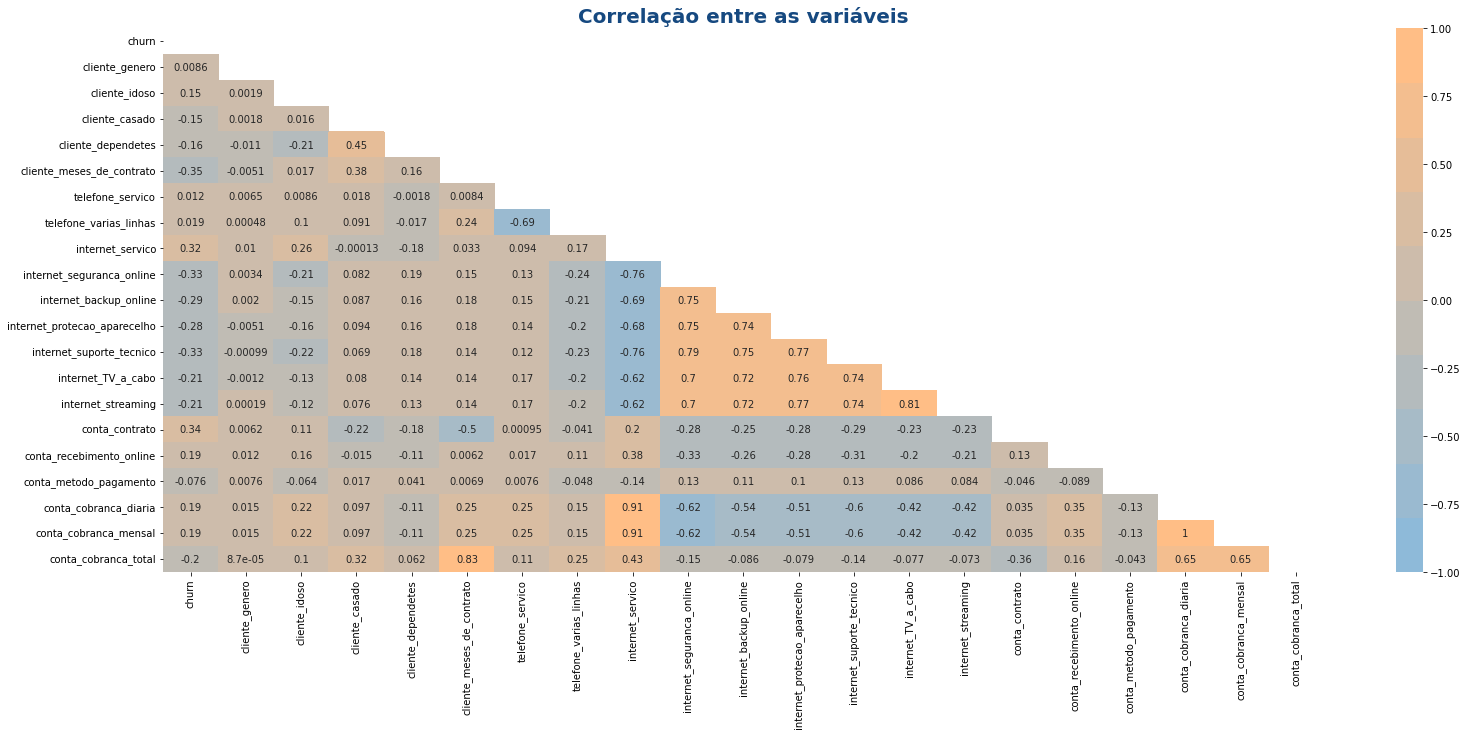

In [35]:
plt.figure(figsize=(26, 10))
cmap = sns.color_palette('blend:#8ebad9,#ffbe86', 10)
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
ax = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap=cmap, mask = mask)
ax.set_title('Correlação entre as variáveis', fontsize=20, color='#164980', weight='bold')

plt.show()

# PERFIL DOS CLIENTES

In [36]:
# contabilizando números de clientes por categorias
def count_categorias(dados_clientes):
    counts = dados_clientes[colunas_caracteristicas].apply(pd.Series.value_counts)
    counts_T = counts.T
    counts_T['total'] = counts_T[0] + counts_T[1]
    counts_T = counts_T.reset_index(level=0)
    counts_T[[0, 1]] /= counts_T['total'] 
    counts_T['total'] = 1
    counts_T[[0, 1, 'total']] *= 100
    return counts_T

In [37]:
def plot_caracteristicas(dados_clientes, titulo):
    map_genero = {0:'MASCULINO', 1:'FEMININO'}
    map_classes = {0:'NÃO', 1:'SIM'}

    plt.figure(figsize=(10, 10))

    fig = sns.barplot(x="total", y="index", data=dados_clientes, label=False, color="#164980")

    for i in range(len(dados_clientes)):
        if i == 0:
            text = f'{dados_clientes[1][i]:.2f}% {map_genero[1]}'
        else:
            text = f'{dados_clientes[1][i]:.2f}% {map_classes[1]}'

        pos_x = 84

        if i == 0:
            pos_x = 76
        
        plt.text(pos_x, i, text, color='w', weight='bold', fontsize=12)

    fig2 = sns.barplot(x=0, y="index", data=dados_clientes, label=False, color="#81d712")

    for i in range(len(dados_clientes)):
        if i == 0:
            text = f'{dados_clientes[0][i]:.2f}% {map_genero[0]}'
        else:
            text = f'{dados_clientes[0][i]:.2f}% {map_classes[0]}'

        pos_x = 1
        
        plt.text(pos_x, i, text, color='w', weight='bold', fontsize=12)
    
    fig2.set_xlabel('')
    fig2.set_ylabel('')
    #fig2.set_yticklabels(labels_caracteristicas, fontsize=12)
    fig2.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
    plt.title(titulo, fontsize=18, weight='bold')


In [38]:
colunas_caracteristicas = ['cliente_genero' ,
'cliente_idoso'                     ,
'cliente_casado'                    ,
'cliente_dependetes'                ,

'telefone_servico'                  ,
'telefone_varias_linhas'             ,
'internet_servico'                   ,
'internet_seguranca_online'          ,
'internet_backup_online'             ,
'internet_protecao_aparecelho'       ,
'internet_suporte_tecnico'           ,
'internet_TV_a_cabo'                 ,
'internet_streaming'                 ,
'conta_contrato'                     ,
'conta_recebimento_online'          ,
'conta_metodo_pagamento'             ]


In [39]:
# cliente_sem_churn = df.query('churn == 0')
# counts_T = count_categorias(cliente_sem_churn)
# plot_caracteristicas(counts_T, 'Perfil dos Clientes sem Churn')

In [40]:
# clientes_churn = df.query('churn == 1')
# counts_churn = count_categorias(clientes_churn)
# plot_caracteristicas(counts_churn, 'Perfil dos Clientes com Churn')

# Machine Learning

In [41]:
df.churn.value_counts(normalize=True) * 100

0    73.463013
1    26.536987
Name: churn, dtype: float64

Dados desbalanceados

In [42]:
from sklearn.preprocessing import OrdinalEncoder

colunas_encoder = ['internet_servico', 'conta_contrato', 'conta_metodo_pagamento']
encoder = OrdinalEncoder()
df[colunas_encoder] = encoder.fit_transform(df[colunas_encoder])

In [43]:
# Separação dos conjuntos X e y e remoção de variáveis irrelavantes
X = df.drop(['ID_cliente', 'churn', 'conta_cobranca_total', 'conta_cobranca_diaria', 'cliente_genero', 'telefone_servico'], axis=1)
y = df['churn']

# Criação da variável streaming
f_streming = lambda x: 1 if x.internet_TV_a_cabo or x.internet_streaming else 0
X['streaming'] = X.apply(f_streming, axis=1)

# Criação da variável seguranca
f_seguranca = lambda x: 1 if x.internet_backup_online or x.internet_protecao_aparecelho else 0
X['seguranca'] = X.apply(f_seguranca, axis=1)

# Remoção das variáveis redundantes
X.drop(['internet_backup_online', 'internet_protecao_aparecelho', 'internet_TV_a_cabo', 'internet_streaming'], axis=1, inplace=True)

In [44]:
from imblearn.under_sampling import RandomUnderSampler

balanceador = RandomUnderSampler(random_state=101)

X_resampled, y_resampled = balanceador.fit_resample(X, y)

In [45]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)
scaler = MinMaxScaler()

# Função para rodar os modelos
def run_modelo(modelo, X, y, cv):
    X = scaler.fit_transform(X)
    cv_results = cross_validate(modelo, X, y, cv=cv, n_jobs=-1, scoring=['precision', 'recall', 'accuracy'])
    acuracia_media = round(cv_results['test_accuracy'].mean(), 3)
    precisao_media =  round(cv_results['test_precision'].mean(), 3)
    recall_medio = round(cv_results['test_recall'].mean(), 3)
    return [acuracia_media, precisao_media, recall_medio]

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

rfc = RandomForestClassifier(random_state=101, n_jobs=-1)
adc = AdaBoostClassifier(random_state=101)
lr = LogisticRegression(random_state=101)
gnb = GaussianNB()
knn = KNeighborsClassifier(n_jobs=-1)
svc = SVC(random_state=101)

modelos = [rfc, adc, lr, gnb, knn, svc]
nome_modelos = ['RandomForest', 'AdaBoost', 'LinearRegression', 'NaiveBayes', 'KNN', 'SVM']
resultados = []

for i, modelo in enumerate(modelos):
    print(nome_modelos[i])
    resultados.append(run_modelo(modelo, X_resampled, y_resampled, skf))

resultados = pd.DataFrame(resultados, index=nome_modelos, columns=['Acurácia', 'Precisão', 'Recall'])
resultados

RandomForest
AdaBoost
LinearRegression
NaiveBayes
KNN
SVM


,Acurácia,Precisão,Recall
RandomForest,0.745,0.745,0.746
AdaBoost,0.769,0.746,0.817
LinearRegression,0.758,0.747,0.781
NaiveBayes,0.742,0.714,0.807
KNN,0.723,0.703,0.775
SVM,0.757,0.742,0.787


In [47]:
resultados.sort_values(by=['Acurácia', 'Recall', 'Precisão'], ascending=False)

,Acurácia,Precisão,Recall
AdaBoost,0.769,0.746,0.817
LinearRegression,0.758,0.747,0.781
SVM,0.757,0.742,0.787
RandomForest,0.745,0.745,0.746
NaiveBayes,0.742,0.714,0.807
KNN,0.723,0.703,0.775


In [48]:
from sklearn.model_selection import GridSearchCV

parametros = {
    'n_estimators': [50, 100, 150, 200, 250],
    'learning_rate': [.25, .5, .75, 1., 1.25],
}

busca_parametros = GridSearchCV(
    estimator = adc,
    param_grid = parametros,
    cv = skf
)

busca_parametros.fit(X_resampled, y_resampled)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=101, shuffle=True),
             estimator=AdaBoostClassifier(random_state=101),
             param_grid={'learning_rate': [0.25, 0.5, 0.75, 1.0, 1.25],
                         'n_estimators': [50, 100, 150, 200, 250]})

In [49]:
busca_parametros.best_estimator_

AdaBoostClassifier(random_state=101)

In [50]:
adc_best = AdaBoostClassifier(learning_rate=0.25, n_estimators=150, random_state=101)
print('Acurácia | Precisão | Recall')
print(run_modelo(adc_best, X_resampled, y_resampled, skf))

Acurácia | Precisão | Recall
[0.766, 0.747, 0.804]


In [51]:
resultados.loc['AdaBoost']

Acurácia    0.769
Precisão    0.746
Recall      0.817
Name: AdaBoost, dtype: float64

In [52]:
run_modelo(adc_best, X, y, skf)

[0.803, 0.661, 0.528]

In [53]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=101)
X_oversampling, y_oversampling = ros.fit_resample(X, y)
run_modelo(adc_best, X_oversampling, y_oversampling, skf)

[0.77, 0.748, 0.813]